<a href="https://colab.research.google.com/github/UknowYunmo/Image-Processing/blob/main/06-OpenCV_%EC%9E%84%EA%B3%84%EC%A0%90_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cv2.threshold(image,thresh,max_value,type)
# 임계값을 기준으로 흑/백으로 분류하는 함수

- image : 처리할 Gray Scale 이미지
- thresh : 임계 값 (전체 픽셀에 적용)
- max_value : 임계 값을 넘었을 때 적용할 값
- type : 임계점을 처리하는 방식

THRESH_BINARY : 임계값보다 크면 max_value, 작으면 0
THRESH_BINARY_INV : 임계값보다 작으면 max_value, 크면 0
THRESH_TRUNC : 임계값보다 크면 임계값, 작으면 그대로
THRESH_TOZERO : 임계값보다 크면 그대로, 작으면 0
THRESH_TOZERO_INV : 임계값보다 크면 0, 작으면 그대로


In [1]:
from google.colab import files
uploaded=files.upload()

Saving images.jfif to images.jfif


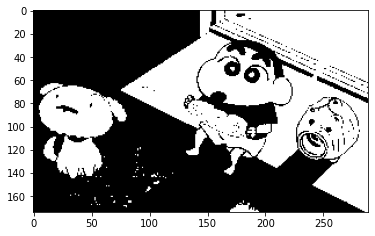

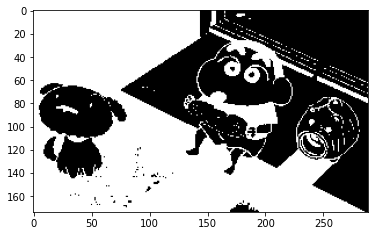

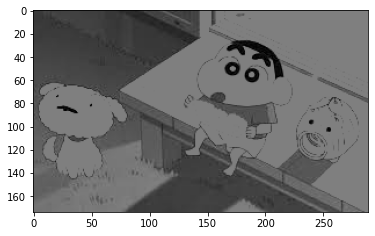

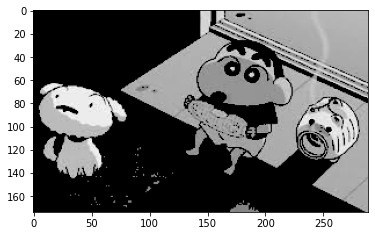

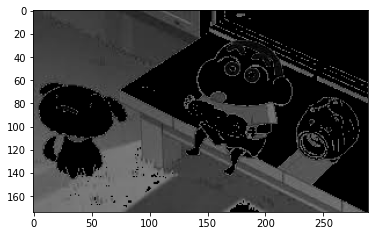

In [8]:
import cv2
import matplotlib.pyplot as plt

image=cv2.imread('images.jfif',cv2.IMREAD_GRAYSCALE)

images=[]
ret, thres1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY) # 127을 기준으로 나누고, 그걸 넘으면 255로 처리
ret, thres2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO_INV)
#ret는 전부 127로 임계점을 의미함

images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  plt.imshow(cv2.cvtColor(i,cv2.COLOR_GRAY2RGB))
  plt.show()

이미지의 적응 임계점 처리

- 하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용하면 좋다

In [ ]:
cv2.adaptiveThreshold(image,max_value,adaptive_method,type,block_size,C) # 적응 임계점 처리 함수

- max_value : 임계 값을 넘었을 때 적용할 값
- adaptive_method : 임계 값을 결정하는 계산 방법
ADAPTIVE_THRESH_MEAN_C : 주변 영역의 평균값으로 결정
ADAPTIVE_THRESH_GAUSSIAN_C : 가우시안 분포에 따라 중심점은 크고 주변엔 점점 상대적으로 적은 값으로
- type : 임계점을 처리하는 방식
- block_size : 임계 값을 적용할 영역의 크기
- C : 평균이나 가중 평균에서 차감할 값

-> Adaptive Threshold를 이용하면, 전체 픽셀을 기준으로 임계 값을 적용하지 않는다. ***Threshold와의 차이점***

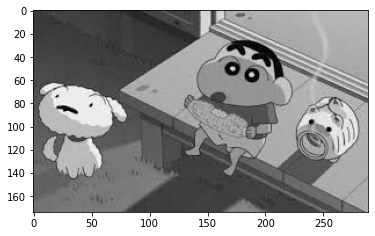

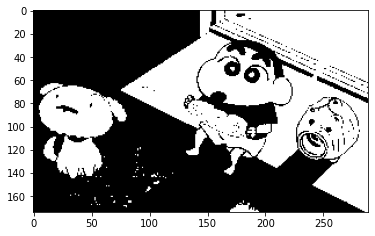

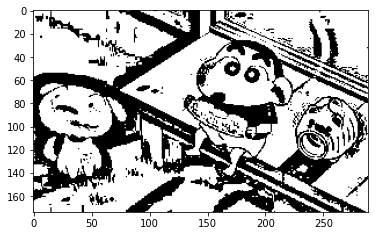

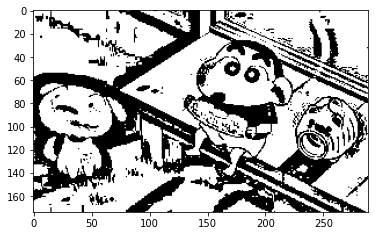

In [19]:
ret, thres1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
thres2=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,3)

plt.imshow(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1,cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2,cv2.COLOR_GRAY2RGB))
plt.show()

thres3=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,3)
plt.imshow(cv2.cvtColor(thres2,cv2.COLOR_GRAY2RGB))
plt.show()